# Five Thirty Eight - Riddler Express (August 25th)

> You take half of a vitamin every morning. The vitamins are sold in a bottle of 100 (whole) tablets, so at first you have to cut the tablets in half. Every day you randomly pull one thing from the bottle — if it’s a whole tablet, you cut it in half and put the leftover half back in the bottle. If it’s a half-tablet, you take the vitamin. You just bought a fresh bottle. How many days, on average, will it be before you pull a half-tablet out of the bottle?

> Extra credit: What if the halves are less likely to come up than the full tablets? They are smaller, after all.

The problem is screaming for Markov modelling but I felt it could be solved using basic probability concepts alone and went ahead with the following approach.  

# Algebraic Solution

In [56]:
from sympy.abc import i, j, k, n, z 
from sympy import Product, factorial, Sum, oo, evalf, factor
from sympy import *
init_printing()

Average number of days before one pulls a half-tablet out is  $\sum_{k=2}^{101}\;k.P(\;First\;Ever\;🚦 🚥_{k^{th} day})$

<br>

And $P(\;First\;Ever\;🚦 🚥_{i^{th} day})\;=\;P(\;💊\;_{1^{st} day})P(\;💊\;_{2^{nd} day})....P( \;💊\;_{i-1^{th} day})P(\;🚦 🚥_{i^{th} day})$

<br>

After a few simplifications, the required answer can be expressed as

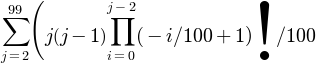

In [51]:
simplify(expectedDays)

This is probably the point where something cool can be done, say for example, using  inequalities to get upper and lower bounds or conjuring up some distribution / arrangement that maps to these coefficients. I chose the boring method of letting the computer handle these calculations though. I was more interested in implementing a simulation for this problem and wanted the get the answer algebraically so that I can compare it with the number the simulation spits out.   

In [59]:
expectedDays = Sum(Product(1-i/100, (i, 0, j-2) )*j*(j-1)/100, (j, 2, 99))
expectedDays.evalf()

## Bonus Credit Solution

In  case, a whole-tablet is $\lambda$ times more likely than a half-tablet to be picked

In [49]:
def modifiedExpectedDays(Lambda):
    return Sum(Product((Lambda*(100-i)/(Lambda*(100-i) + i)),
                       (i, 0, j) )*(j+1)*(j+2)/(Lambda*(100-j-1) + j+1),
                       (j, 1, 99)).evalf()

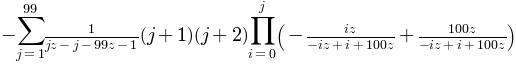

In [57]:
factor(modifiedExpectedDays(z))

In [58]:
modifiedExpectedDays(2) # If the whole-tablet is twice as likely to be picked

## How the expected number of days varies with Lambda

In [41]:
b = [int(modifiedExpectedDays(factor)) for factor in range(1,1000,100)]

In [63]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Scatter(
            x=[1,101,201,301,401,501,601,701,801,901],
            y=b,
            mode='lines+markers',
            line=dict(shape='spline')

    )]

py.iplot(data, filename='spline-interpolation')

In [60]:
modifiedExpectedDays(2000000000000000)

Converges to 101 just as expected

# Simulation Solution

In [3]:
import numpy as np
import plotly
import random
import sympy
from sympy import *
init_printing()
import plotly

## Bottle, Day Zero

In [22]:
bottle = np.ones(100)

## Tablet eject logic

In [39]:
def takeMedicine(sizeMatters=False, verbose=False):
    global bottle
    if sizeMatters:
        glottle = bottle[bottle > 0.5]
        pill = random.choice(np.concatenate((bottle,glottle)))
    else:    
        pill = random.choice(bottle)
    if pill == 1.0:
        bottle[np.argmax(bottle==1.0)] = 0.5
        if verbose:
            print("Whole Tablets {}, Half Tablets {}     💊".format(currentStatus()[0], currentStatus()[1]))
        return 1
    else:
        bottle = np.delete(bottle, np.argmax(bottle==0.5) )
        if verbose:
            print("Whole Tablets {}, Half Tablets {}     🚦 🚥".format(currentStatus()[0], currentStatus()[1]))
        return 0   

## Days taken to pull a half-tablet out 

In [6]:
def daysTaken(sizeMatters=False, verbose=False):
    global bottle
    days = 0
    for day in range(1,201):
        if takeMedicine(sizeMatters, verbose):
            days += 1
        else:
            bottle = np.ones(100)
            break
    return days + 1

## Average of a million first half-tablet sightings

In [7]:
def averageDays(sizeMatters=False, verbose=False, numberOfRuns=1000000):
    totalDays = 0
    for element in range(numberOfRuns):
        totalDays += daysTaken(sizeMatters, verbose)       
    return totalDays/numberOfRuns      

# Results

![results](http://linkdot.link/images/runtime.jpeg)

##  Extra: Entire State History

In [20]:
def completeRun():
    global bottle
    days = 0
    for day in range(1,201):       
        days += 1
        print("On Day {}: ".format(days))
        takeMedicine(1, 1)
    bottle = np.ones(100)    

In [17]:
def currentStatus(noHalfPills=True, noMorePills=False):
    global bottle
    unique, counts = np.unique(bottle, return_counts=True)
    uniqueCounts = dict(zip(unique, counts))
        
    try:
        numFullPills = uniqueCounts[1.0]
    except KeyError:
        numFullPills = 0
    try:
        numHalfPills = uniqueCounts[0.5]
    except KeyError:
        numHalfPills = 0    
    return numFullPills, numHalfPills

In [40]:
completeRun()

On Day 1: 
Whole Tablets 99, Half Tablets 1     💊
On Day 2: 
Whole Tablets 98, Half Tablets 2     💊
On Day 3: 
Whole Tablets 97, Half Tablets 3     💊
On Day 4: 
Whole Tablets 96, Half Tablets 4     💊
On Day 5: 
Whole Tablets 95, Half Tablets 5     💊
On Day 6: 
Whole Tablets 94, Half Tablets 6     💊
On Day 7: 
Whole Tablets 93, Half Tablets 7     💊
On Day 8: 
Whole Tablets 92, Half Tablets 8     💊
On Day 9: 
Whole Tablets 91, Half Tablets 9     💊
On Day 10: 
Whole Tablets 90, Half Tablets 10     💊
On Day 11: 
Whole Tablets 89, Half Tablets 11     💊
On Day 12: 
Whole Tablets 88, Half Tablets 12     💊
On Day 13: 
Whole Tablets 87, Half Tablets 13     💊
On Day 14: 
Whole Tablets 86, Half Tablets 14     💊
On Day 15: 
Whole Tablets 85, Half Tablets 15     💊
On Day 16: 
Whole Tablets 84, Half Tablets 16     💊
On Day 17: 
Whole Tablets 83, Half Tablets 17     💊
On Day 18: 
Whole Tablets 82, Half Tablets 18     💊
On Day 19: 
Whole Tablets 81, Half Tablets 19     💊
On Day 20: 
Whole Tablets 80, 